In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,Sequential,datasets
from PIL import Image
from glob import glob
 
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
import cv2
import gc
import os
import warnings
warnings.filterwarnings("ignore")

In [7]:
(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


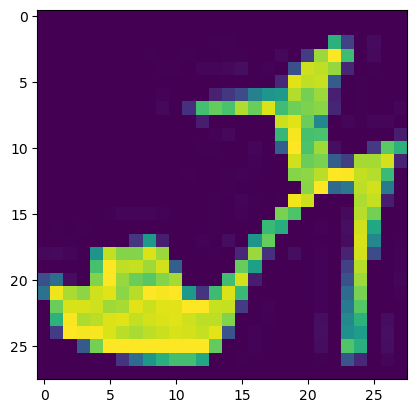

In [21]:
plt.imshow(x_train[9])

In [29]:
x_train.shape

(60000, 28, 28)

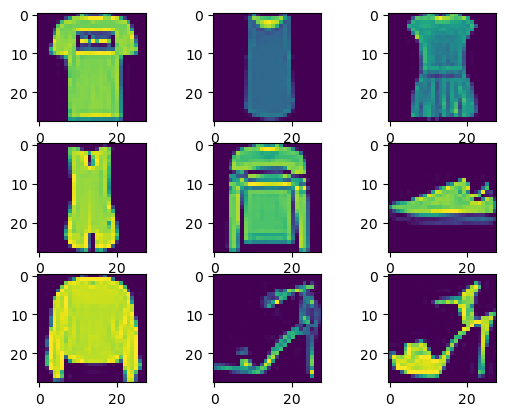

In [19]:
for i in range (1,10):
    plt.subplot(3,3,i)
    plt.imshow(x_train[i])

In [23]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [33]:
cnn=models.Sequential([
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3), activation="relu",input_shape=(28,28,1)),
                  layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu",input_shape=(28,28,1)),
                  layers.MaxPooling2D((2,2)),


    
    layers.Flatten(),
    layers.Dense(120,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10,activation="softmax"),
])
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
cnn.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7307 - loss: 0.7533
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8587 - loss: 0.3972
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8797 - loss: 0.3351
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8918 - loss: 0.2958
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8990 - loss: 0.2747
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9051 - loss: 0.2524
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9116 - loss: 0.2400
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9189 - loss: 0.2248
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9194 - loss: 0.2111
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9242 - loss: 0.2046


In [35]:
cnn.evaluate(x_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9051 - loss: 0.2824


[0.26995354890823364, 0.9078999757766724]

In [39]:
yp=cnn.predict(x_test_scaled)
yp[:4]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[4.77639179e-16, 2.25978898e-18, 4.08783421e-16, 1.13981192e-14,
        1.39606053e-18, 1.52109492e-09, 1.39218364e-18, 8.06198932e-06,
        5.39259714e-16, 9.99991894e-01],
       [1.32159116e-07, 5.55590284e-17, 9.99983788e-01, 1.17820840e-11,
        2.29815996e-07, 2.50750234e-16, 1.58594739e-05, 5.94287828e-18,
        2.43353358e-11, 4.84568557e-17],
       [5.24948371e-17, 1.00000000e+00, 8.24953564e-23, 1.31752625e-17,
        9.07837084e-22, 5.47586930e-24, 7.50675856e-16, 2.58818418e-34,
        4.63136672e-23, 1.15124669e-32],
       [1.01686378e-16, 1.00000000e+00, 1.53725347e-21, 2.04367239e-15,
        1.19028899e-19, 2.25728673e-22, 9.93680608e-15, 2.05688284e-30,
        7.38795564e-23, 5.56397610e-29]], dtype=float32)

In [43]:
y_test[:9]

array([9, 2, 1, 1, 6, 1, 4, 6, 5], dtype=uint8)

In [57]:
np.argmax(yp[8])

5

In [107]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │       192,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,440 (2.43 MB)

 Trainable params: 212,146 (828.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 424,294 (1.62 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
ankle_boots


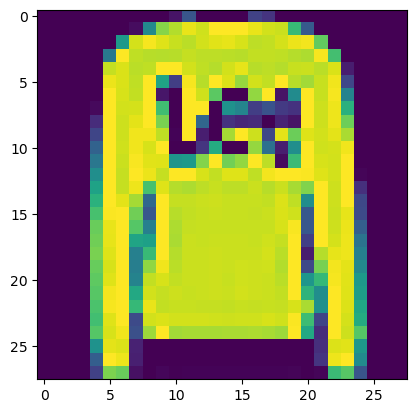

In [93]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
		'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = cnn.predict(x_test[:2])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(x_test[:2][1])
plt.show()
